In [2]:
pwd

'/home/wsuser/work'

# Importing the required libraries

In [3]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

11501568/11490434 [==============================] - 0s 0us/step


# Add CNN Layers

In [5]:
#create model
model=Sequential ()

In [6]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [7]:
#flatten the dimension of the image
model.add(Flatten())

In [8]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [9]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [10]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [11]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.2223 - accuracy: 0.9529 - val_loss: 0.0820 - val_accuracy: 0.9758
Epoch 2/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0665 - accuracy: 0.9795 - val_loss: 0.0749 - val_accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.0949 - val_accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0349 - accuracy: 0.9897 - val_loss: 0.0811 - val_accuracy: 0.9784
Epoch 5/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.1021 - val_accuracy: 0.9777


# Observing the metrics

In [12]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10214217752218246, 0.9776999950408936]


In [13]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

[[7.1600936e-18 1.4626292e-18 1.0742020e-16 3.6067590e-08 3.0330958e-07
  2.8834513e-08 8.7462898e-20 1.6485779e-09 1.8707755e-09 9.9999964e-01]]


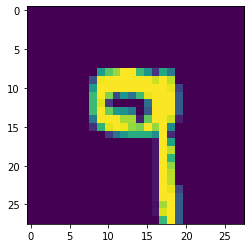

In [14]:
plt.imshow(x_test[6000])

In [15]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [16]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [17]:
# Save the model
model.save('mnistCNN.h5')

In [18]:
!zip -r digit_recognition_model.zip mnistCNN.h5

  adding: mnistCNN.h5 (deflated 6%)


In [19]:
ls

digit_recognition_model.zip  mnistCNN.h5


In [20]:
!pip install watson-machine-learning-client --upgrade 

     |████████████████████████████████| 538 kB 10.1 MB/s eta 0:00:01███████████▎          | 358 kB 10.1 MB/s eta 0:00:01


In [21]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"wPp9vkWQLPm1rl6GK9kcKpb1n1kwFS1af5-YBBbkk8_w"
}
client=APIClient(wml_credentials)

In [22]:
client=APIClient(wml_credentials)

In [23]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [33]:
space_uid=guid_from_space_name(client,'A_Novel_Handwritten_Digit_Recognition_System')
print('Space UID ='+space_uid)
    


Space UID =45575996-0e53-45f4-9a11-eac7619a5a79


In [34]:
client.set.default_space(space_uid)

'SUCCESS'

In [35]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [36]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [37]:
model_details=client.repository.store_model(model='digit_recognition_model.zip',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})

model_id=client.repository.get_model_id(model_details)

In [38]:
model_id=client.repository.get_model_id(model_details)

In [39]:
model_id

'0b93e55c-a3c8-44cf-b45f-60b05c58eb3a'

In [40]:
client.repository.download(model_id,"new_model.zip")

Successfully saved model content to file: 'new_model.zip'


'/home/wsuser/work/new_model.zip'